In [65]:
import EnsembleXAI.Metrics as Metrics
import EnsembleXAI.Ensemble as Ensemble
import torchvision.transforms.functional as transform
import torch
from torchvision.transforms import Resize
import os
from PIL import Image
import matplotlib.pyplot as plt

In [52]:
dir_outside = "\\".join(os.getcwd().split(sep="\\")[:-1] + ['input'])
class_id = "n01491361"
path_masks = dir_outside + f'\\ImageNetS50\\train-semi-segmentation\\{class_id}\\'
kagglepath = f"/ILSVRC/Data/CLS-LOC/train/{class_id}/"
shark_filenames = os.listdir(path_masks)
resizer = Resize([224,224])
all_tensors = []
all_images = []
all_masks = []
for filename in shark_filenames:
    filename_jpeg = filename[:-3] + 'JPEG'
    #remove below comment to download the imagenet images. Kaggle user api key is required.
    #!kaggle competitions download -f {kagglepath}{filename} -p ./images -c imagenet-object-localization-challenge
    image = Image.open('.\\images\\'+filename_jpeg)
    image = resizer.forward(image)
    mask = Image.open(path_masks + filename)
    mask = resizer.forward(mask)
    mask = transform.to_tensor(mask)
    mask = (mask>0).float()
    x = transform.to_tensor(image)
    all_images.append(image)
    all_tensors.append(x)
    all_masks.append(mask)

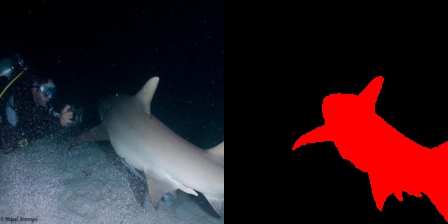

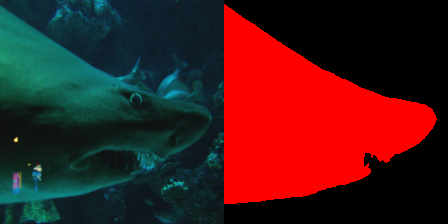

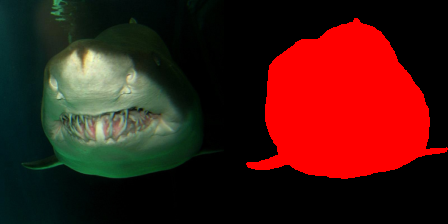

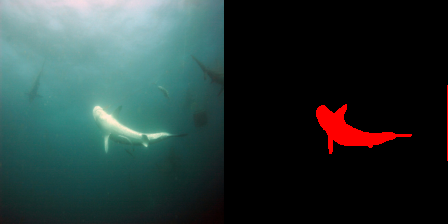

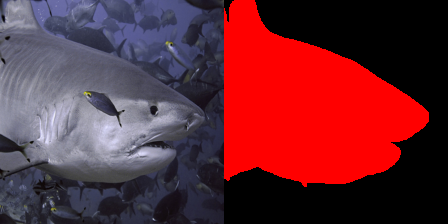

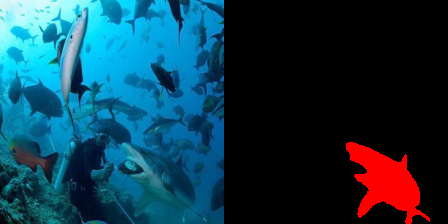

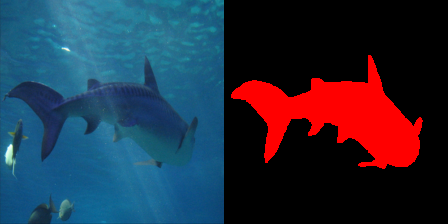

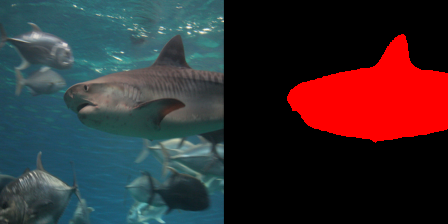

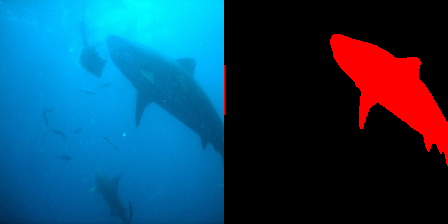

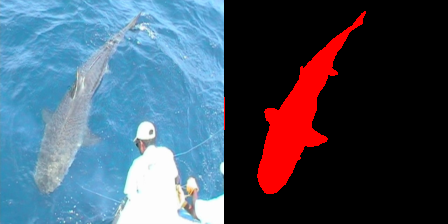

In [83]:
for tensor, mask in zip(all_tensors, all_masks):
    photo = torch.cat([tensor, mask], dim=2)
    display(transform.to_pil_image(photo))

In [87]:
torch.stack(all_tensors).shape

torch.Size([10, 3, 224, 224])

In [88]:
torch.stack(all_masks).shape

torch.Size([10, 3, 224, 224])